Result  0


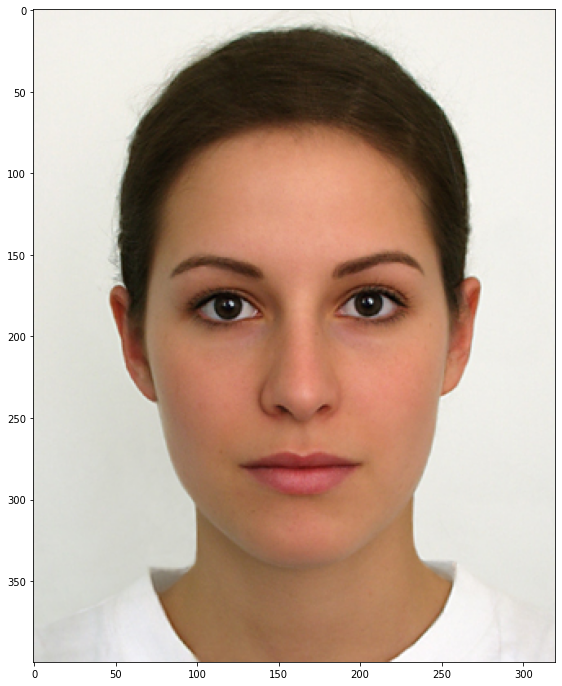

Result  1


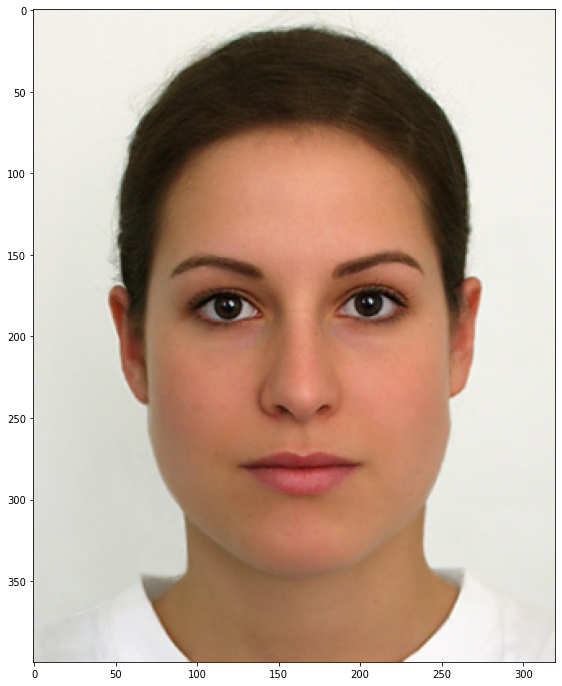

Result  2


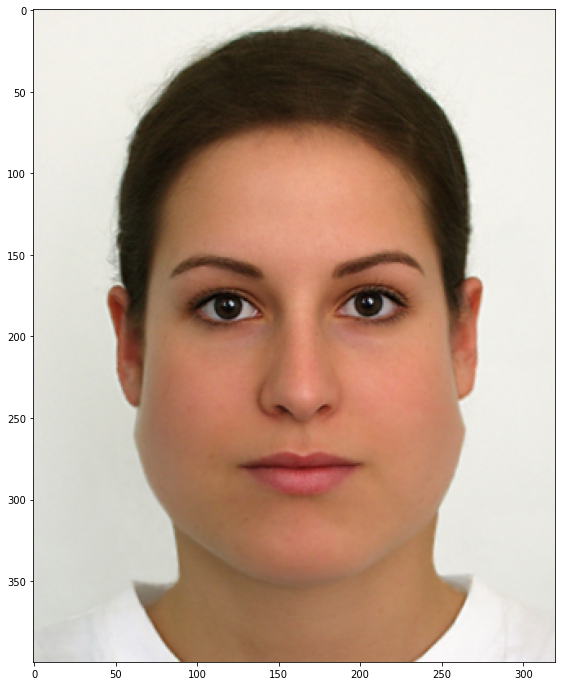

Result  3


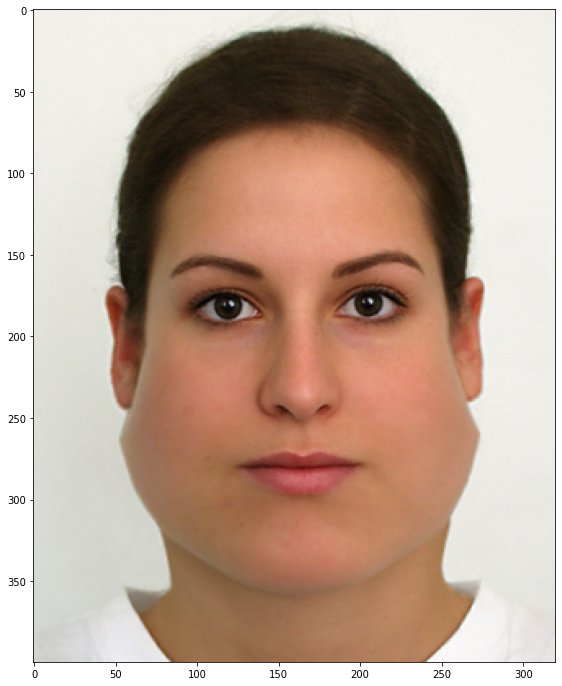

Result  4


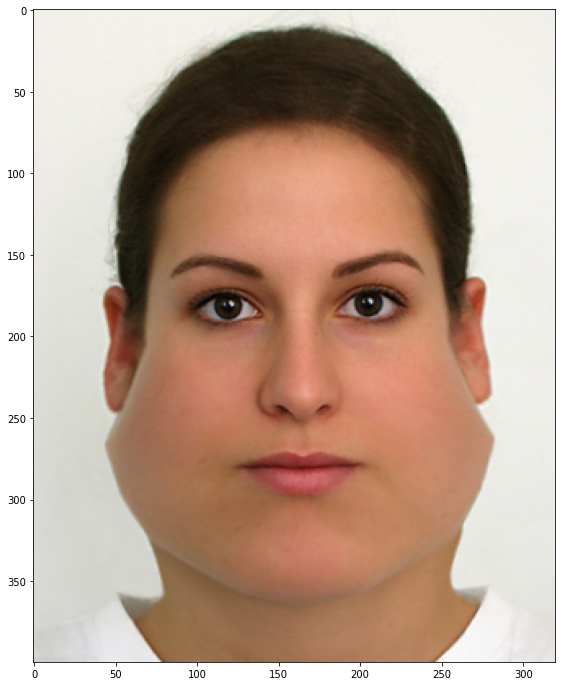

In [1]:
import matplotlib.pyplot as plt

from pychubby.actions import Chubbify, Multiple, Pipeline, Smile
from pychubby.detect import LandmarkFace

img_path = 'image.jpg'
img = plt.imread(img_path)

lf = LandmarkFace.estimate(img)

for i in range(5):
    a_per_face = Pipeline([Chubbify(0.1*i)])#Smile()])
    a_all = Multiple(a_per_face)

    new_lf, _ = a_all.perform(lf)
    print("Result ", i)
    new_lf.plot(show_landmarks=False, show_numbers=False)

In [2]:
from pychubby.actions import Action, Lambda

class CustomAction(Action):

    def __init__(self, scale=0.3):
        self.scale = scale

    def perform(self, lf):
        a_l = Lambda(scale=self.scale,
                     specs={'CHIN': (90, 2),
                            'CHIN_L': (110, 1),
                            'CHIN_R': (70, 1),
                            'OUTER_NOSTRIL_L': (-135, 1),
                            'OUTER_NOSTRIL_R': (-45, 1)
                           }
                    )

        return a_l.perform(lf)

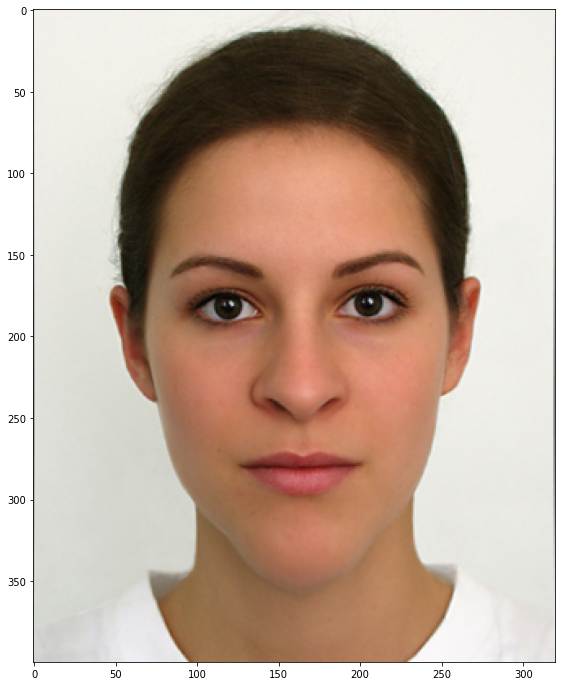

In [3]:
#Implementing a custom action
a_l = Lambda(scale=0.1,
                     specs={'CHIN': (90, 2),
                            'CHIN_L': (110, 1),
                            'CHIN_R': (70, 1),
                            'OUTER_NOSTRIL_L': (-135, 1),
                            'OUTER_NOSTRIL_R': (-45, 1),
                           }
                    )

a_per_face = Pipeline([a_l])
a_all = Multiple(a_per_face)

new_lf2, _ = a_all.perform(lf)
new_lf2.plot(show_landmarks=False, show_numbers=False)

#### Seems like I can define my own actions with default parameters that target every part of the face (like an action that targets the area around the eyes, the jaw, or the forehead) and either makes them longer/shorter/bigger/smaller

However I am looking for the dictionary of `specs` that should allow me to do this

### Update:
- [Name -> Number Mapping](https://github.com/jankrepl/pychubby/blob/04d8f66273da6f9bd2f85b740681b56ec5c25ddb/pychubby/detect.py#L13-L82)
- [Visualizaton of what the numbers represent](https://www.researchgate.net/figure/The-68-landmarks-detected-by-dlib-library-This-image-was-created-by-Brandon-Amos-of-CMU_fig2_329392737)
- [Scale + Relative Size + Angles](https://imgur.com/dLcFQNI)

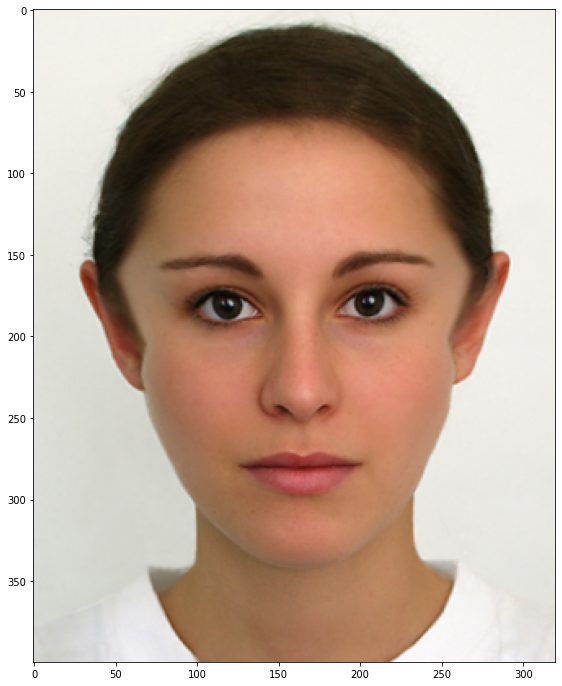

In [4]:
temple_forehead_widening_specs = {
            2: (-135, 0.4),
            3: (-135, 0.4),
            14: (-45, 0.4),
            13: (-45, 0.4),
            0: (-135, 1),
            16: (-45, 1),
            26: (-45, 0.4),
            17: (-135, 0.4),
            23: (-70, 0.2),
            20: (-115, 0.2),
            27: (90, 0.1),
            44: (-45, 0.1),
            37: (-135, 0.1),
            
            # 3: (160, 1),
            # 13: (20, 1),
            # 4: (150, 1),
            # 12: (30, 1),
            # "LOWER_CHEEK_L": (-140, 1),
            # "LOWER_CHEEK_R": (-40, 1),
            # "LOWERMOST_CHEEK_L": (-130, 0.8),
            # "LOWERMOST_CHEEK_R": (-50, 0.8),
            # "CHIN_L": (-120, 0.7),
            # "CHIN_R": (-60, 0.7),
            # "CHIN": (-90, 0.7),
            }
temple_forehead_widening = Lambda(scale=0.3, specs=temple_forehead_widening_specs)
a_per_face = Pipeline([temple_forehead_widening])
a_all = Multiple(a_per_face)

new_lf2, _ = a_all.perform(lf)
new_lf2.plot(show_landmarks=False, show_numbers=False)

### Lower Face chubbification

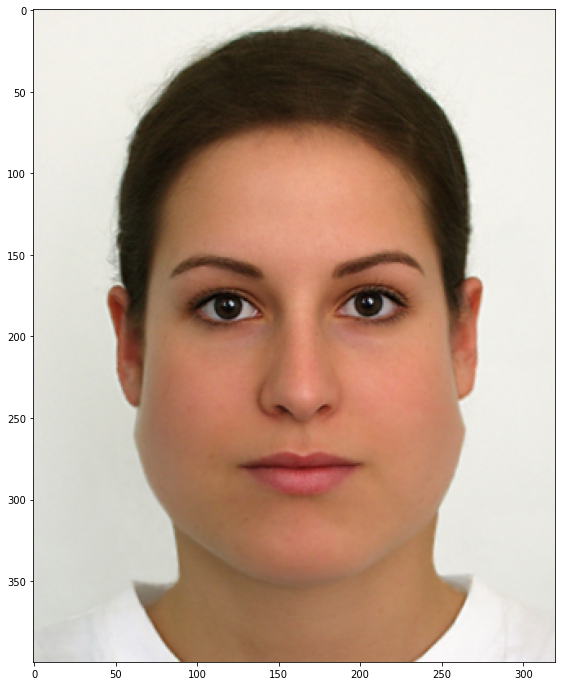

In [5]:
chubby_lower_face_specs = {
            "LOWER_TEMPLE_L": (170, 0.4),
            "LOWER_TEMPLE_R": (10, 0.4),
            "UPPERMOST_CHEEK_L": (160, 1),
            "UPPERMOST_CHEEK_R": (20, 1),
            "UPPER_CHEEK_L": (150, 1),
            "UPPER_CHEEK_R": (30, 1),
            "LOWER_CHEEK_L": (140, 1),
            "LOWER_CHEEK_R": (40, 1),
            "LOWERMOST_CHEEK_L": (130, 0.8),
            "LOWERMOST_CHEEK_R": (50, 0.8),
            "CHIN_L": (120, 0.7),
            "CHIN_R": (60, 0.7),
            "CHIN": (90, 0.7),
        }
chubby_lower_face = Lambda(scale=0.2, specs=chubby_lower_face_specs)
chubbifier = Pipeline([chubby_lower_face])
chubbifier1 = Multiple(chubbifier)
new_image1, _ = chubbifier1.perform(lf)
new_image1.plot(show_landmarks=False, show_numbers=False)

### Lower face skinnification

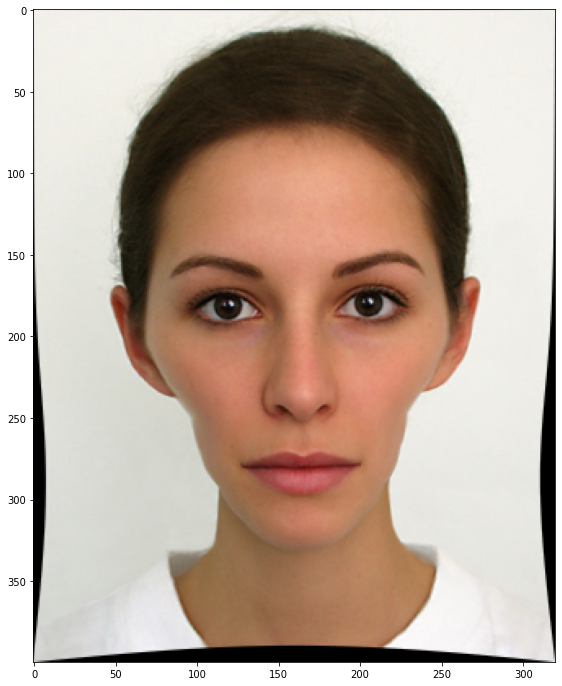

In [6]:
skinny_lower_face = Lambda(scale=-0.2, specs=chubby_lower_face_specs) ##simply reverted the scale here
skinnifier = Pipeline([skinny_lower_face])
skinnifier1 = Multiple(skinnifier)
new_image2, _ = skinnifier1.perform(lf)
new_image2.plot(show_landmarks=False, show_numbers=False)

### Testing out pipelines for fun

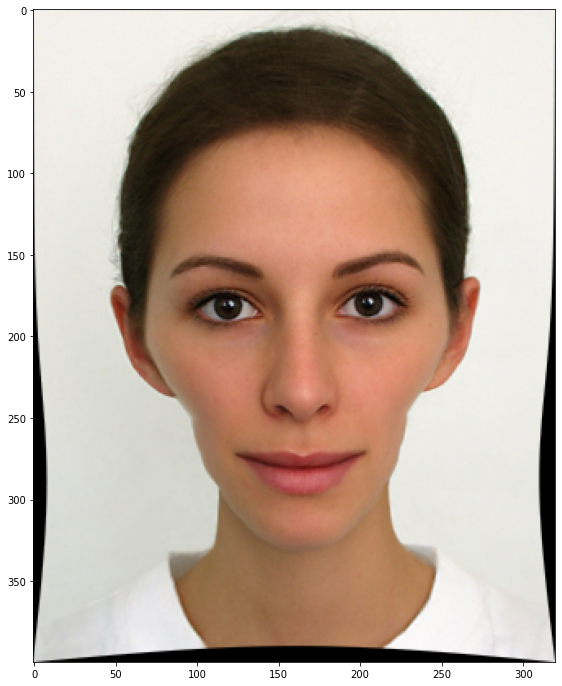

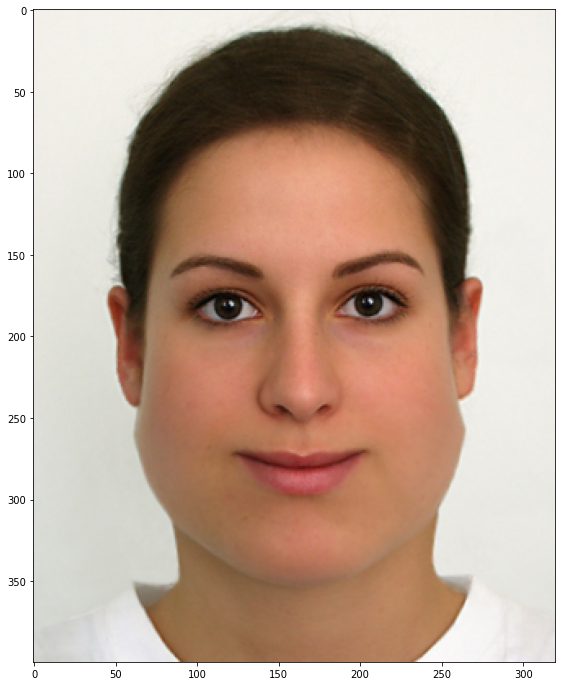

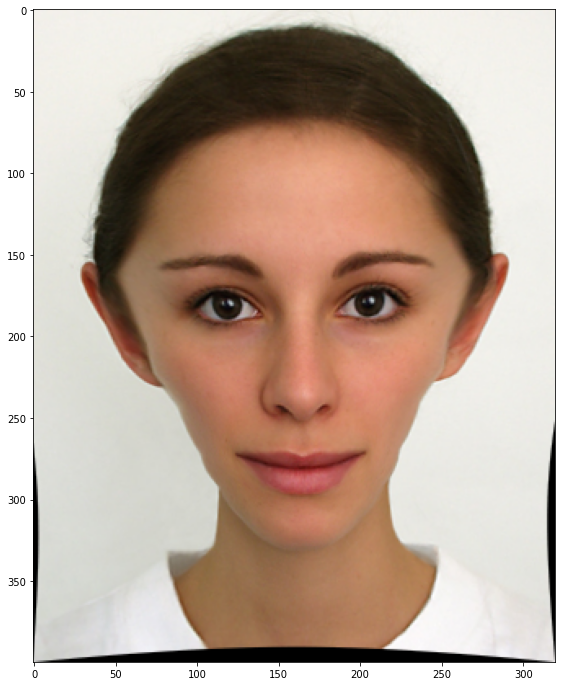

In [7]:
pipe = Pipeline([skinny_lower_face, Smile(0.1)])
pipe1 = Multiple(pipe)
new_image3, _ = pipe1.perform(lf)
new_image3.plot(show_landmarks=False, show_numbers=False)

piper = Pipeline([chubby_lower_face, Smile(0.1)])
pipe2 = Multiple(piper)
new_image4, _ = pipe2.perform(lf)
new_image4.plot(show_landmarks=False, show_numbers=False)

piperr = Pipeline([skinny_lower_face, Smile(0.1), temple_forehead_widening])
pipe3 = Multiple(piperr)
new_image5, _ = pipe3.perform(lf)
new_image5.plot(show_landmarks=False, show_numbers=False)

### Face bottom widening

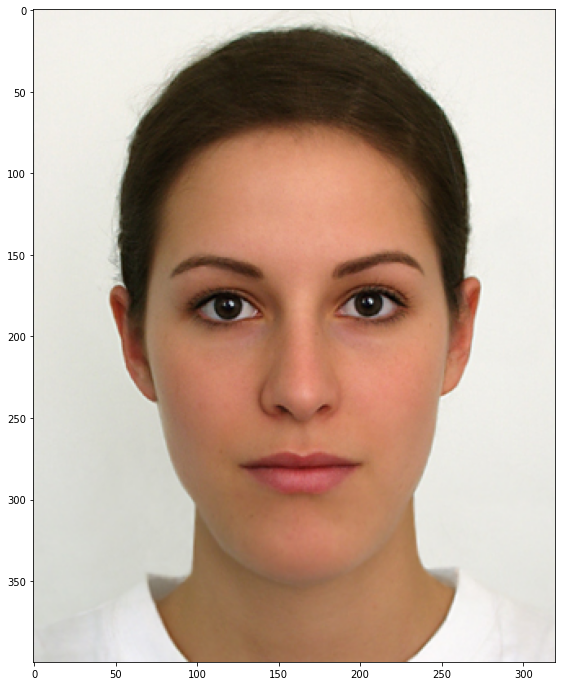

In [8]:
face_bottom_widening_specs = {
            8: (90, 0.7),
            10: (70, 0.5),
            6: (110, 0.5),
            57: (-90, 0.1),
            7: (110, 0.5),
            9: (70, 0.5),
            
        }
face_bottom_widening = Lambda(scale=0.2, specs=face_bottom_widening_specs)
pipe = Pipeline([face_bottom_widening])
mult = Multiple(pipe)
new_image, _ = mult.perform(lf)
new_image.plot(show_landmarks=False, show_numbers=False)